In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.arange(15,dtype='int64')

<Figure size 432x288 with 0 Axes>

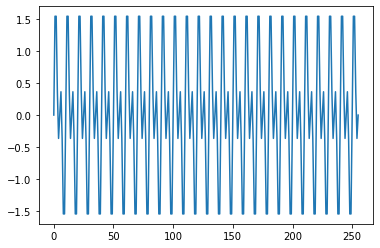

<Figure size 432x288 with 0 Axes>

In [89]:
#signal generation
F1 = 100
F2 = 200
# F3 = 350
# F4 = 600
# Fs = 1000
SL = 256  #signal length
L=8
M=32
N = SL

s = np.zeros(SL)
for n in range(SL):
    s[n] = np.sin(2*np.pi*F1*n/Fs)+np.sin(2*np.pi*F2*n/Fs)
plt.plot(s[0:SL])
plt.figure()

<ipython-input-78-e1371aedf3ff>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)


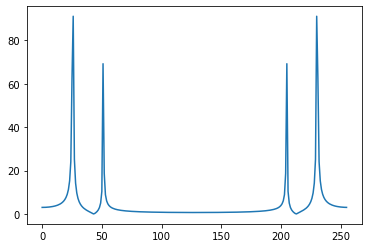

In [90]:
S = DFT(s,N)
plt.plot(abs(S))

In [91]:
x = np.reshape(s,(L, M),order='F')

In [108]:

def DFT(x,N):
    X = np.zeros(N)
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)
    return X

In [109]:
F = np.zeros((L, M))
for l in range(L):
    f = x[l, :]
    F[l, :] = DFT(f,M)


<ipython-input-108-e1371aedf3ff>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)


(8, 32)

In [94]:
W = np.zeros((L, M))

for l in range(L):
    for q in range(M):
        W[l, q] = np.exp(-1j*2*np.pi/N*l*q)


<ipython-input-94-b20d3fd87b48>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  W[l, q] = np.exp(-1j*2*np.pi*l*q)


In [95]:
G = np.zeros((L,M))
G = W * F


In [96]:
X = np.zeros((L, M))
for q in range(M):
    g = G[:, q]
    X[:, q] = DFT(g,L)

<ipython-input-92-e1371aedf3ff>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)


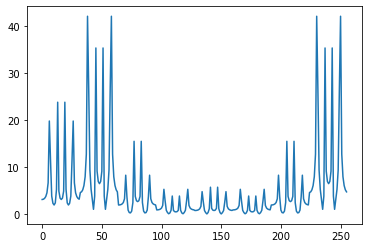

In [97]:
Y = np.reshape(X, (N,), order='C')
plt.plot(abs(Y))